# Section 2 – Supervised learning


Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import time
import random
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt


### 1. Train Test Split

In [2]:
# Load train and test data (created in section 1)
pca_train = pd.read_csv("pca_training.csv")
pca_test = pd.read_csv("pca_testing.csv")

# Standardize PCA data before training (improve results for some models)
scaler = StandardScaler()
pca_train_scaled = pd.DataFrame(
    scaler.fit_transform(pca_train.drop(columns=['label'])),
    columns=pca_train.columns[:-1],
    index=pca_train.index
).assign(label=pca_train['label'])

pca_test_scaled = pd.DataFrame(
    scaler.transform(pca_test.drop(columns=['label'])),
    columns=pca_test.columns[:-1],
    index=pca_test.index
).assign(label=pca_test['label'])


###  2. ML model Training and Evaluation.

#### 2. a) Perform training on 3 ML Models

In [13]:
# Separation of features and labels for training
X = pca_train_scaled.drop(columns=['label'])
y = pca_train_scaled['label']

# Division of training set and validation set (stratified sampling ensures consistent label distribution)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Define the 3 ML models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic_regressor': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # training model
    model.fit(X_train, y_train)

    # prediction
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Save results
    results[model_name] = {
        'train_acc': accuracy_score(y_train, y_train_pred),
        'val_acc': accuracy_score(y_val, y_val_pred),
        'confusion_matrix':confusion_matrix(y_val, y_val_pred, labels=y.unique()),
        'classification_report': classification_report(y_val, y_val_pred, output_dict=True)
    }


Training Random Forest...

Training Logistic_regressor...

Training KNN...


Show the results for each model


Performance Results for the Random Forest...

Training Accuracy: 1.0000
 Validation Accuracy: 0.9933

Classification Report:
 [[1233    0    0    1    0    0    0    0    0    0    0    0]
 [   0 1215    0    0    0    0    0    8    0    0    1    0]
 [   2    1 1108    0    0    4    4    1    0    0    7    0]
 [   0    4    0 1245    0    0    2    3    0    0    0    0]
 [   0    0    0    0 1105    0    0    0    0    0    0    0]
 [   0    6    3    0    0 1234    1    1    0    0    0    0]
 [   0    0    2    0    0    0 1177    0    0    0    9    0]
 [   0    5    0    0    0    4    0 1233    0    0    0    0]
 [   1    0    2    0    0    0    0    0 1254    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1151    0    0]
 [   0    0    2    0    0    0   16    0    0    0  189    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1257]]


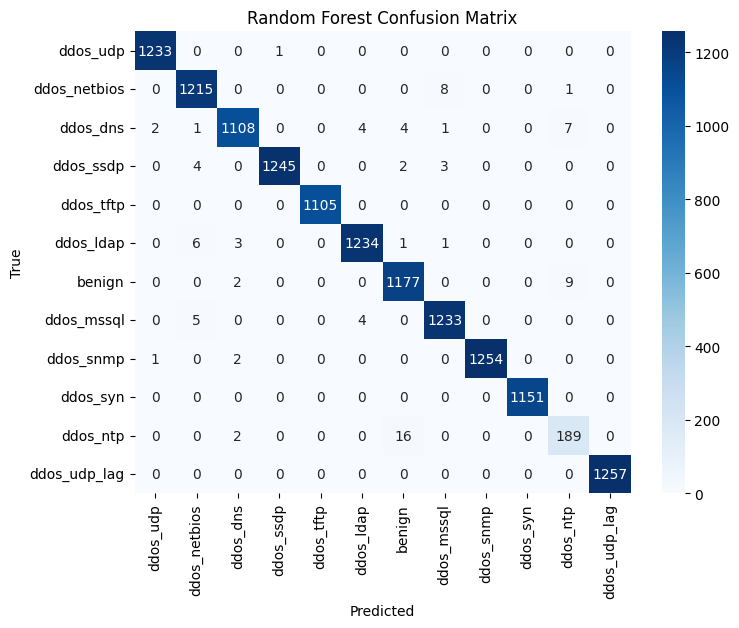


Performance Results for the Logistic_regressor...

Training Accuracy: 0.9735
 Validation Accuracy: 0.9722

Classification Report:
 [[1233    0    0    1    0    0    0    0    0    0    0    0]
 [   0 1171    0    0    0    0    0   53    0    0    0    0]
 [   0    0 1082    0    0   38    6    0    1    0    0    0]
 [   1    0    0 1251    0    1    1    0    0    0    0    0]
 [   0    0    0    0 1105    0    0    0    0    0    0    0]
 [   0    0    2    0    0 1204    1   38    0    0    0    0]
 [   0    0   15    4    0    0 1136    1    7    0   24    1]
 [   0    6    0    0    0    9    0 1227    0    0    0    0]
 [   1    0    0    0    0    0    0    0 1256    0    0    0]
 [   0    0    0    0   24    0    0    0    0 1127    0    0]
 [   0    1    0    0    0    0  127    0    3    9   67    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1257]]


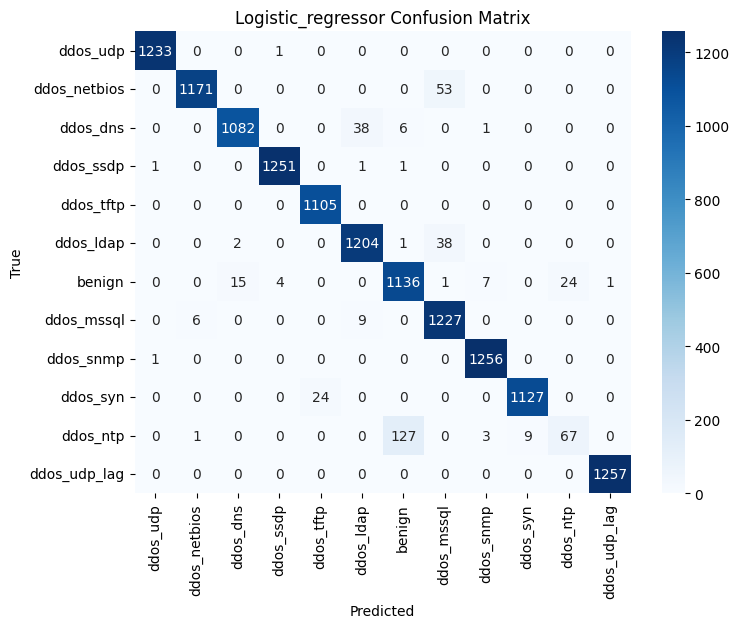


Performance Results for the KNN...

Training Accuracy: 0.9934
 Validation Accuracy: 0.9907

Classification Report:
 [[1233    0    0    1    0    0    0    0    0    0    0    0]
 [   0 1216    0    0    0    0    0    8    0    0    0    0]
 [   0    2 1106    0    0    5    8    0    0    0    6    0]
 [   1    0    0 1251    0    0    2    0    0    0    0    0]
 [   0    0    0    0 1102    0    3    0    0    0    0    0]
 [   0    2    5    0    0 1231    1    6    0    0    0    0]
 [   0    1    4    0    0    0 1149    0    2    1   31    0]
 [   0    3    2    0    0    3    0 1234    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1257    0    0    0]
 [   0    0    0    0    9    0    0    0    0 1142    0    0]
 [   0    1    2    0    3    0   12    0    0    1  188    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1257]]


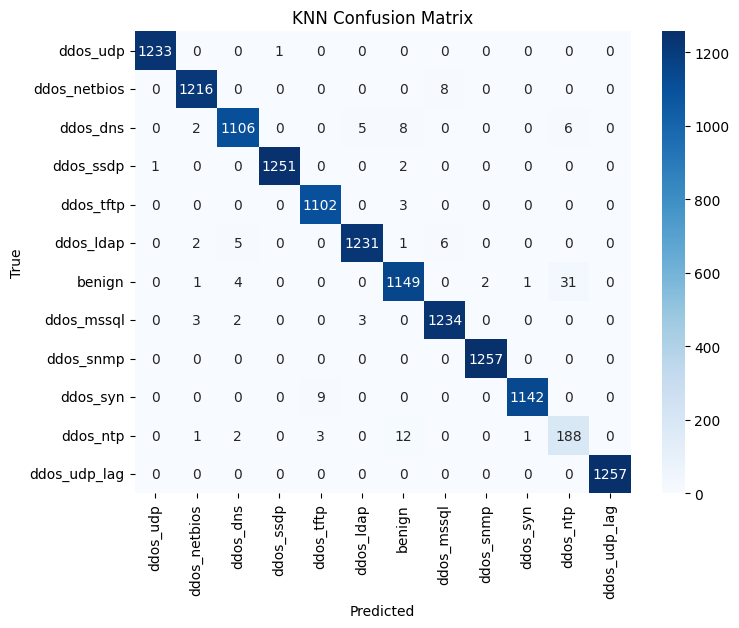

In [15]:
for model_name, metrics in results.items():
    
    # Obtain the metrics obtained during training
    train_acc, test_acc, cm, cr = metrics['train_acc'], metrics['val_acc'], metrics['confusion_matrix'], metrics['classification_report']

    print(f"\nPerformance Results for the {model_name}...\n")

    # Print accuracy metrics
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f" Validation Accuracy: {test_acc:.4f}")

    # Print classification report
    print("\nClassification Report:\n", cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=y.unique(), yticklabels=y.unique(), cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### 2. c) Hyper-parameter tuning

Random forest grid search 

In [49]:
best_combination = [0, 1, 2, 3, 4]
acc_max = 0
idx = -1
idx_best = idx
info_accuracy_train = []
info_accuracy_val = []
training_times = []

for n_estimators in [50, 100, 200]:
    for max_depth in [4, 8, None]:
        for min_samples_split in [2, 4]:
            for max_features in ['sqrt', 'log2', None]:
                idx += 1

                random_states = set()
                while len(random_states) < 5:
                    n = random.randint(0, 1000000)
                    random_states.add(n)

                accuracies_train_tmp = []
                accuracies_val_tmp = []

                start_time = time.time()

                for random_state in random_states:
                    X_train, X_val, y_train, y_val = train_test_split(
                        X, y,
                        stratify=y,
                        train_size=0.5 / 0.7,
                        random_state=random_state
                    )

                    rf_tmp = RandomForestClassifier(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        max_features=max_features,
                        random_state=0
                    )
                    rf_tmp.fit(X_train, y_train)
                    accuracies_train_tmp.append(accuracy_score(y_train, rf_tmp.predict(X_train)))
                    accuracies_val_tmp.append(accuracy_score(y_val, rf_tmp.predict(X_val)))

                end_time = time.time()
                training_time = end_time - start_time
                training_times.append(training_time)

                accuracies_tmp = np.array(accuracies_train_tmp)
                mean_acc = accuracies_tmp.mean()
                min_acc = accuracies_tmp.min()
                max_acc = accuracies_tmp.max()
                info_accuracy_train.append((mean_acc, min_acc, max_acc))

                accuracies_tmp = np.array(accuracies_val_tmp)
                mean_acc = accuracies_tmp.mean()
                min_acc = accuracies_tmp.min()
                max_acc = accuracies_tmp.max()
                info_accuracy_val.append((mean_acc, min_acc, max_acc))

                if mean_acc >= acc_max:
                    idx_best = idx
                    acc_max = mean_acc
                    best_combination[0] = n_estimators
                    best_combination[1] = max_depth
                    best_combination[2] = min_samples_split
                    best_combination[3] = max_features

print('Best:')
print(
    f'n_estimators: {best_combination[0]}, ' +
    f'max_depth: {best_combination[1]}, ' +
    f'min_samples_split: {best_combination[2]}, ' +
    f'max_features: {best_combination[3]}'
)

Best:
n_estimators: 100, max_depth: None, min_samples_split: 2, max_features: None


Visualize the training, validation accuracy and training time

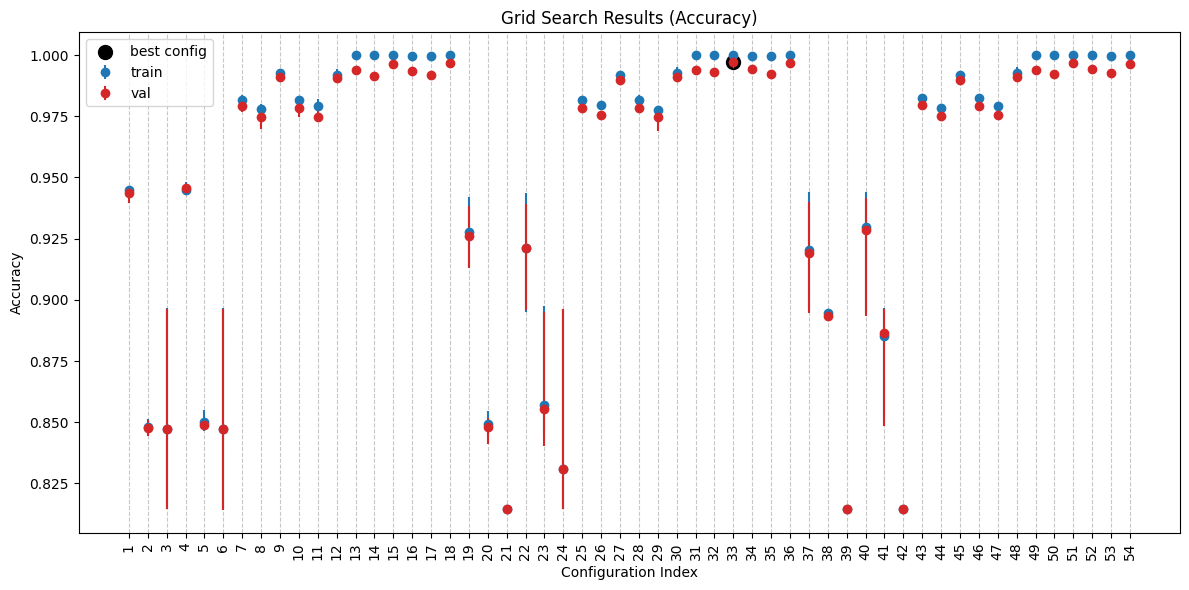

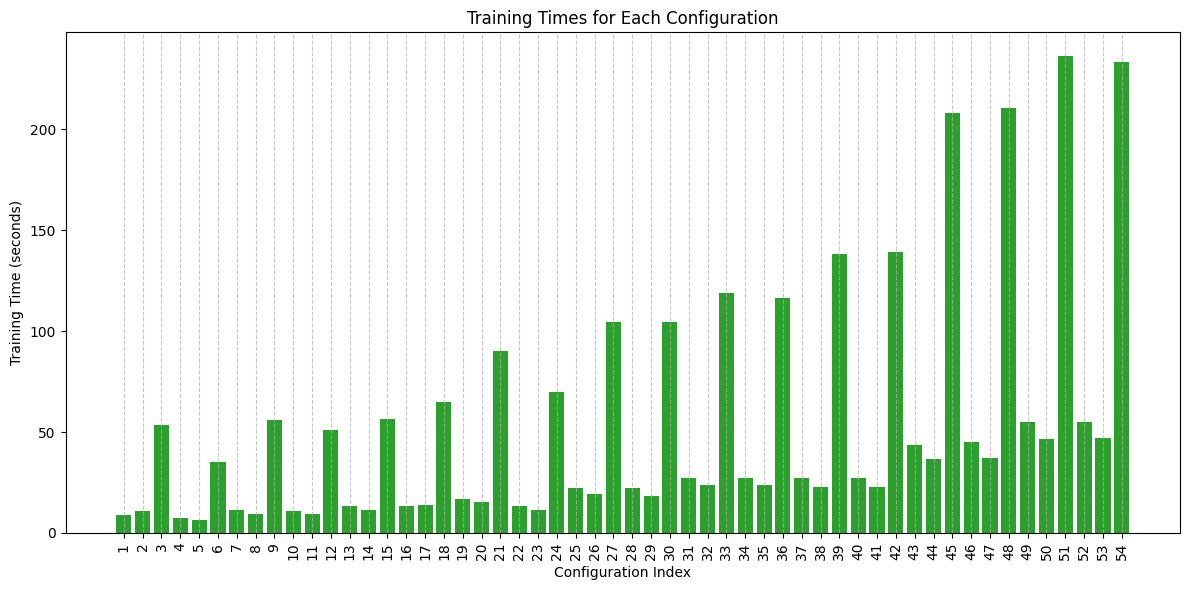

In [50]:
# Accuracy metrics graph
plt.figure(figsize=(12, 6))
x = [i for i in range(1, len(info_accuracy_train) + 1)]
plt.errorbar(
    x,
    [info_accuracy_train[i][0] for i in range(len(info_accuracy_train))],
    yerr=(
        [info_accuracy_train[i][0] - info_accuracy_train[i][1] for i in range(len(info_accuracy_train))],
        [info_accuracy_train[i][2] - info_accuracy_train[i][0] for i in range(len(info_accuracy_train))]
    ),
    marker='o',
    color='tab:blue',
    label='train',
    linestyle=''
)
plt.errorbar(
    x,
    [info_accuracy_val[i][0] for i in range(len(info_accuracy_val))],
    yerr=(
        [info_accuracy_val[i][0] - info_accuracy_val[i][1] for i in range(len(info_accuracy_val))],
        [info_accuracy_val[i][2] - info_accuracy_val[i][0] for i in range(len(info_accuracy_val))]
    ),
    marker='o',
    color='tab:red',
    label='val',
    linestyle=''
)
plt.scatter(idx_best + 1, acc_max, marker='o', color='black', s=100, label='best config')
plt.title("Grid Search Results (Accuracy)")
plt.xlabel("Configuration Index")
plt.ylabel("Accuracy")
plt.xticks(x, rotation=90) 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.legend()
plt.tight_layout()
plt.show()

# Training time graph
plt.figure(figsize=(12, 6))
plt.bar(x, training_times, color='tab:green')
plt.title("Training Times for Each Configuration")
plt.xlabel("Configuration Index")
plt.ylabel("Training Time (seconds)")
plt.xticks(x, rotation=90) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Print top 10 performances, train time and parameters

In [51]:
combinations = []
for n_estimators in [50, 100, 200]:
    for max_depth in [4, 8, None]:
        for min_samples_split in [2, 4]:
            for max_features in ['sqrt', 'log2', None]:
                combinations.append((n_estimators, max_depth, min_samples_split, max_features))

results = [
    {
        "index": i + 1,
        "val_acc_mean": info_accuracy_val[i][0],
        "train_time": training_times[i],
        "params": f"n_estimators={combinations[i][0]}, max_depth={combinations[i][1]}, "
                  f"min_samples_split={combinations[i][2]}, max_features={combinations[i][3]}"
    }
    for i in range(len(info_accuracy_val))
]
results_sorted = sorted(results, key=lambda x: x["val_acc_mean"], reverse=True)

print("Top 10 Configurations (Based on Validation Accuracy):")
for i, res in enumerate(results_sorted[:10]):
    print(
        f"Rank {i+1}: "
        f"Index: {res['index']}, "
        f"Accuracy: {res['val_acc_mean']:.4f}, "
        f"Training Time: {res['train_time']:.2f} seconds, "
        f"Parameters: {res['params']}"
    )


Top 10 Configurations (Based on Validation Accuracy):
Rank 1: Index: 33, Accuracy: 0.9974, Training Time: 118.67 seconds, Parameters: n_estimators=100, max_depth=None, min_samples_split=2, max_features=None
Rank 2: Index: 51, Accuracy: 0.9969, Training Time: 236.20 seconds, Parameters: n_estimators=200, max_depth=None, min_samples_split=2, max_features=None
Rank 3: Index: 36, Accuracy: 0.9968, Training Time: 116.38 seconds, Parameters: n_estimators=100, max_depth=None, min_samples_split=4, max_features=None
Rank 4: Index: 18, Accuracy: 0.9966, Training Time: 64.85 seconds, Parameters: n_estimators=50, max_depth=None, min_samples_split=4, max_features=None
Rank 5: Index: 15, Accuracy: 0.9965, Training Time: 56.22 seconds, Parameters: n_estimators=50, max_depth=None, min_samples_split=2, max_features=None
Rank 6: Index: 54, Accuracy: 0.9965, Training Time: 233.24 seconds, Parameters: n_estimators=200, max_depth=None, min_samples_split=4, max_features=None
Rank 7: Index: 52, Accuracy: 0.9

Logistic Regressor Grid Search

In [52]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)


best_combination = [0, 1, 2, 3]
acc_max = 0
idx = -1
idx_best = idx
info_accuracy_train = []
info_accuracy_val = []
training_times = []

for penalty in ['l1', 'l2', None]:
    for C in [0.1, 1, 10, 100]:
        for max_iter in [100, 250, 500, 1000]:
            idx += 1
            
            # Choose a solver compatible with the current regularization type
            if penalty in ['l1', 'elasticnet']:
                solver = 'saga'
            else: #penalty in ['l2', None]:
                solver = 'lbfgs'
          
            random_states = set()
            while len(random_states) < 5:
                n = random.randint(0, 1000000)
                random_states.add(n)

            accuracies_train_tmp = []
            accuracies_val_tmp = []
            start_time = time.time()

            for random_state in random_states:
                X_train, X_val, y_train, y_val = train_test_split(
                    X, y,
                    stratify=y,
                    train_size=0.5 / 0.7,
                    random_state=random_state
                )

                lr_tmp = LogisticRegression(
                    penalty=penalty,
                    C=C,
                    solver=solver,
                    max_iter=max_iter,
                    random_state=0
                )
                lr_tmp.fit(X_train, y_train)
                accuracies_train_tmp.append(accuracy_score(y_train, lr_tmp.predict(X_train)))
                accuracies_val_tmp.append(accuracy_score(y_val, lr_tmp.predict(X_val)))

            end_time = time.time()
            training_time = end_time - start_time
            training_times.append(training_time)

            if accuracies_train_tmp:
                accuracies_tmp = np.array(accuracies_train_tmp)
                mean_acc = accuracies_tmp.mean()
                min_acc = accuracies_tmp.min()
                max_acc = accuracies_tmp.max()
                info_accuracy_train.append((mean_acc, min_acc, max_acc))

                accuracies_tmp = np.array(accuracies_val_tmp)
                mean_acc = accuracies_tmp.mean()
                min_acc = accuracies_tmp.min()
                max_acc = accuracies_tmp.max()
                info_accuracy_val.append((mean_acc, min_acc, max_acc))

                if mean_acc >= acc_max:
                    idx_best = idx
                    acc_max = mean_acc
                    best_combination[0] = penalty
                    best_combination[1] = C
                    best_combination[2] = max_iter
                    best_combination[3] = solver

print('Best:')
print(
    f'penalty: {best_combination[0]}, ' +
    f'C: {best_combination[1]}, ' +
    f'max_iter: {best_combination[2]}, ' +
    f'solver: {best_combination[3]}'
)


Best:
penalty: None, C: 100, max_iter: 500, solver: lbfgs


Visualize the training, validation accuracy and training time

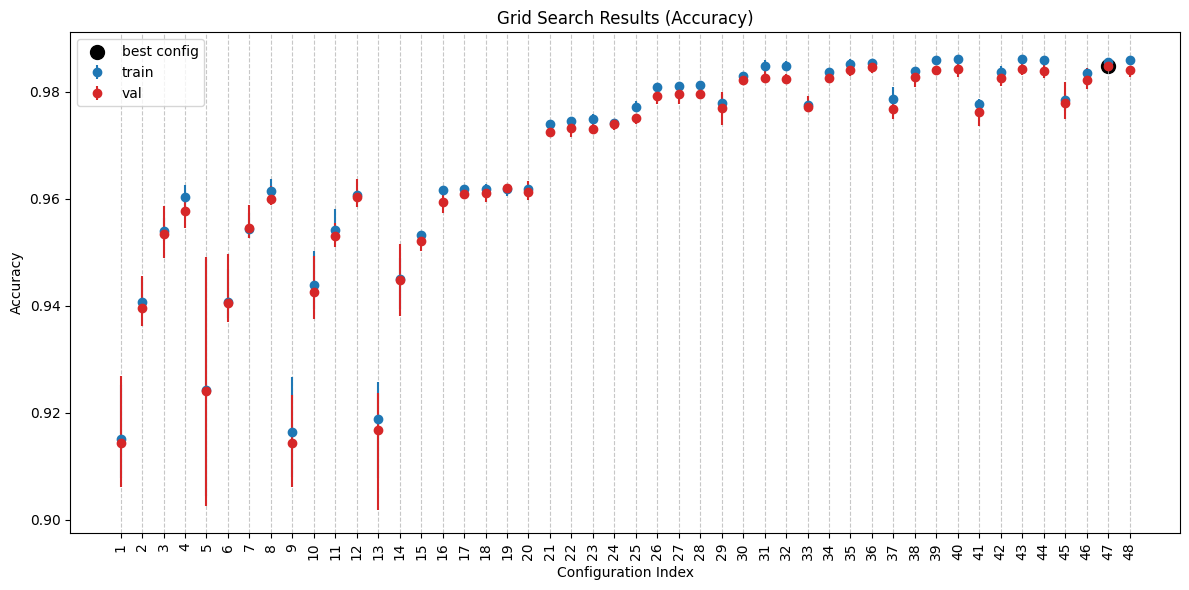

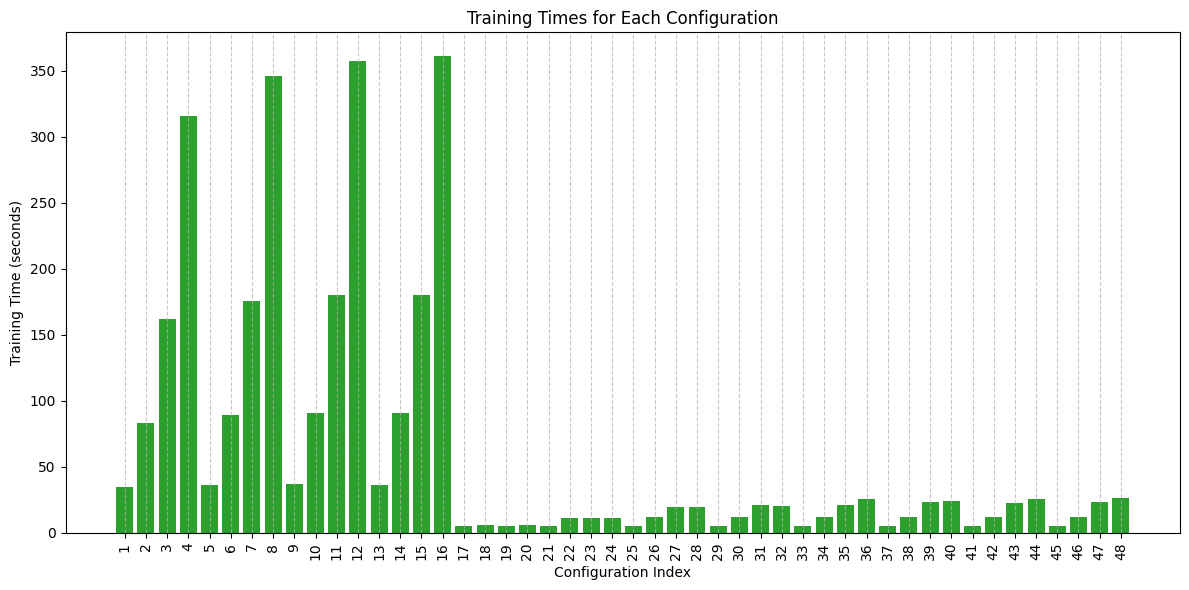

In [53]:
# Accuracy metrics graph
plt.figure(figsize=(12, 6))
x = [i for i in range(1, len(info_accuracy_train) + 1)]
plt.errorbar(
    x,
    [info_accuracy_train[i][0] for i in range(len(info_accuracy_train))],
    yerr=(
        [info_accuracy_train[i][0] - info_accuracy_train[i][1] for i in range(len(info_accuracy_train))],
        [info_accuracy_train[i][2] - info_accuracy_train[i][0] for i in range(len(info_accuracy_train))]
    ),
    marker='o',
    color='tab:blue',
    label='train',
    linestyle=''
)
plt.errorbar(
    x,
    [info_accuracy_val[i][0] for i in range(len(info_accuracy_val))],
    yerr=(
        [info_accuracy_val[i][0] - info_accuracy_val[i][1] for i in range(len(info_accuracy_val))],
        [info_accuracy_val[i][2] - info_accuracy_val[i][0] for i in range(len(info_accuracy_val))]
    ),
    marker='o',
    color='tab:red',
    label='val',
    linestyle=''
)
plt.scatter(idx_best + 1, acc_max, marker='o', color='black', s=100, label='best config')
plt.title("Grid Search Results (Accuracy)")
plt.xlabel("Configuration Index")
plt.ylabel("Accuracy")
plt.xticks(x, rotation=90) 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.legend()
plt.tight_layout()
plt.show()

# Training time graph
plt.figure(figsize=(12, 6))
plt.bar(x, training_times, color='tab:green')
plt.title("Training Times for Each Configuration")
plt.xlabel("Configuration Index")
plt.ylabel("Training Time (seconds)")
plt.xticks(x, rotation=90) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Print top 10 performances, train time and parameters

In [54]:
combinations = []
for penalty in ['l1', 'l2', None]:
    for C in [0.1, 1, 10, 100]:
        for max_iter in [100, 250, 500, 1000]:
            combinations.append((penalty, C, max_iter))

results = [
    {
        "index": i + 1,
        "val_acc_mean": info_accuracy_val[i][0],
        "train_time": training_times[i],
        "params": f"penalty={combinations[i][0]}, C={combinations[i][1]}, "
                  f"max_iter={combinations[i][2]}"
    }
    for i in range(len(info_accuracy_val))
]
results_sorted = sorted(results, key=lambda x: x["val_acc_mean"], reverse=True)

print("Top 10 Configurations (Based on Validation Accuracy):")
for i, res in enumerate(results_sorted[:10]):
    print(
        f"Rank {i+1}: "
        f"Index: {res['index']}, "
        f"Accuracy: {res['val_acc_mean']:.4f}, "
        f"Training Time: {res['train_time']:.2f} seconds, "
        f"Parameters: {res['params']}"
    )


Top 10 Configurations (Based on Validation Accuracy):
Rank 1: Index: 47, Accuracy: 0.9849, Training Time: 23.22 seconds, Parameters: penalty=None, C=100, max_iter=500
Rank 2: Index: 36, Accuracy: 0.9846, Training Time: 25.38 seconds, Parameters: penalty=None, C=0.1, max_iter=1000
Rank 3: Index: 43, Accuracy: 0.9843, Training Time: 22.99 seconds, Parameters: penalty=None, C=10, max_iter=500
Rank 4: Index: 40, Accuracy: 0.9842, Training Time: 24.19 seconds, Parameters: penalty=None, C=1, max_iter=1000
Rank 5: Index: 35, Accuracy: 0.9842, Training Time: 21.16 seconds, Parameters: penalty=None, C=0.1, max_iter=500
Rank 6: Index: 48, Accuracy: 0.9841, Training Time: 26.19 seconds, Parameters: penalty=None, C=100, max_iter=1000
Rank 7: Index: 39, Accuracy: 0.9840, Training Time: 23.14 seconds, Parameters: penalty=None, C=1, max_iter=500
Rank 8: Index: 44, Accuracy: 0.9839, Training Time: 25.44 seconds, Parameters: penalty=None, C=10, max_iter=1000
Rank 9: Index: 38, Accuracy: 0.9828, Trainin

KNN Grid Search

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import time
import random

best_combination = [0, 1, 2]
acc_max = 0
idx = -1
idx_best = idx
info_accuracy_train = []
info_accuracy_val = []
training_times = []

for n_neighbors in [5,7,10,12,15]:
    for weights in ['uniform', 'distance']:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            idx += 1

            random_states = set()
            while len(random_states) < 5:
                n = random.randint(0, 1000000)
                random_states.add(n)

            accuracies_train_tmp = []
            accuracies_val_tmp = []
            start_time = time.time()

            for random_state in random_states:
                X_train, X_val, y_train, y_val = train_test_split(
                    X, y,
                    stratify=y,
                    train_size=0.5 / 0.7,
                    random_state=random_state
                )

                knn_tmp = KNeighborsClassifier(
                    n_neighbors=n_neighbors,
                    weights=weights,
                    algorithm=algorithm
                )
                knn_tmp.fit(X_train, y_train)
                accuracies_train_tmp.append(accuracy_score(y_train, knn_tmp.predict(X_train)))
                accuracies_val_tmp.append(accuracy_score(y_val, knn_tmp.predict(X_val)))

            end_time = time.time()
            training_time = end_time - start_time
            training_times.append(training_time)

            if accuracies_train_tmp:
                accuracies_tmp = np.array(accuracies_train_tmp)
                mean_acc = accuracies_tmp.mean()
                min_acc = accuracies_tmp.min()
                max_acc = accuracies_tmp.max()
                info_accuracy_train.append((mean_acc, min_acc, max_acc))

                accuracies_tmp = np.array(accuracies_val_tmp)
                mean_acc = accuracies_tmp.mean()
                min_acc = accuracies_tmp.min()
                max_acc = accuracies_tmp.max()
                info_accuracy_val.append((mean_acc, min_acc, max_acc))

                if mean_acc >= acc_max:
                    idx_best = idx
                    acc_max = mean_acc
                    best_combination[0] = n_neighbors
                    best_combination[1] = weights
                    best_combination[2] = algorithm

print('Best:')
print(
    f'n_neighbors: {best_combination[0]}, ' +
    f'weights: {best_combination[1]}, ' +
    f'algorithm: {best_combination[2]}'
)


Best:
n_neighbors: 5, weights: distance, algorithm: auto


Visualize the training, validation accuracy and training time

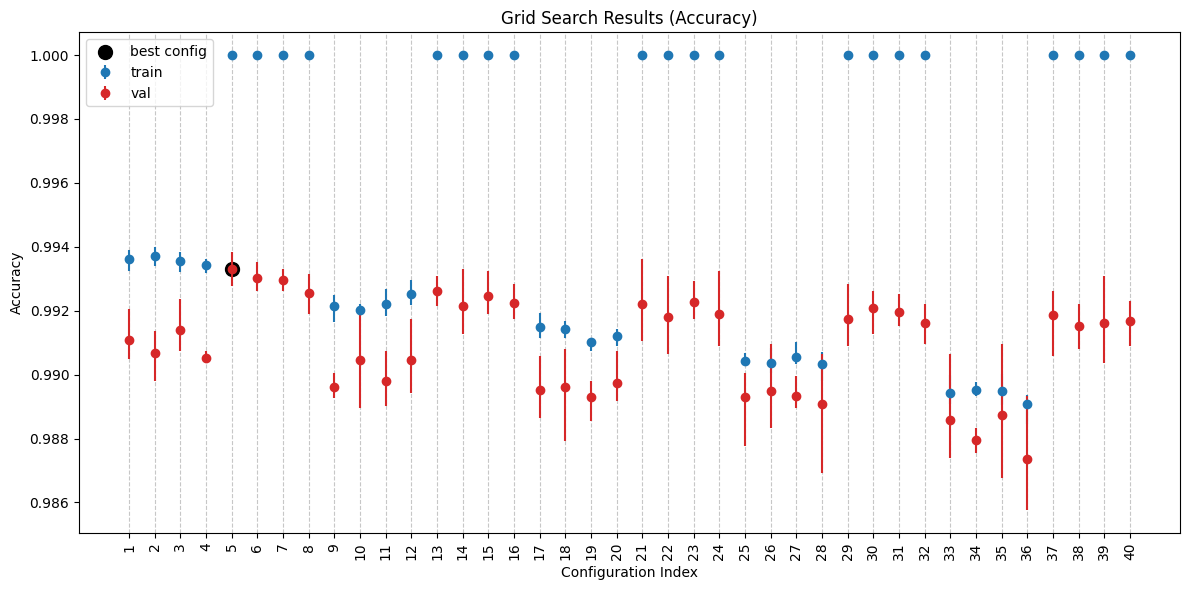

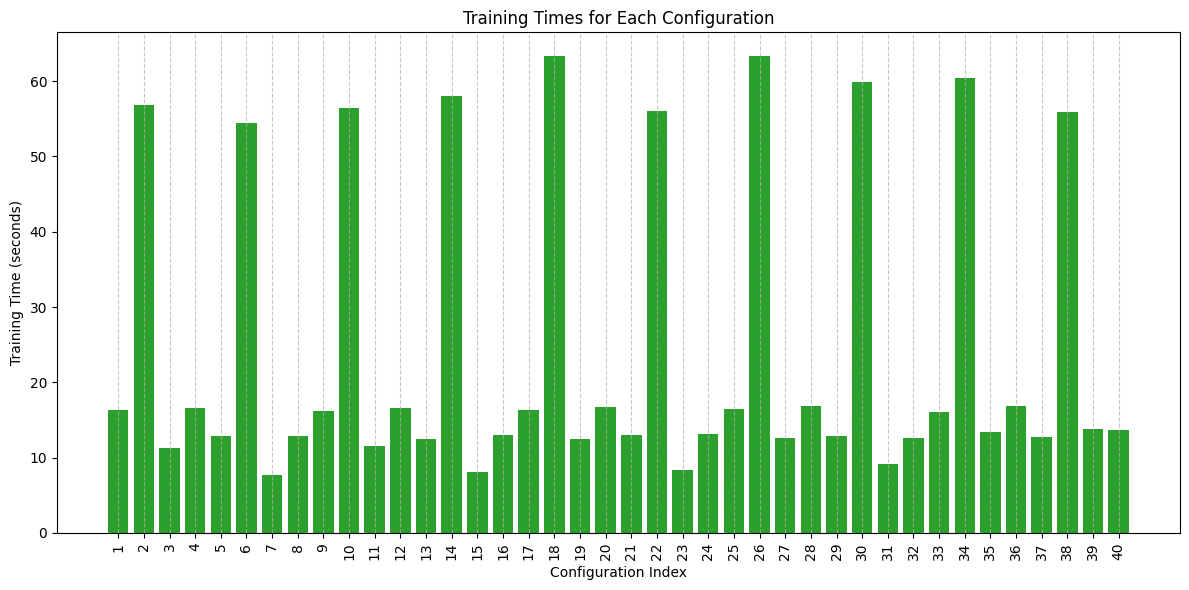

In [56]:
# Accuracy metrics graph
plt.figure(figsize=(12, 6))
x = [i for i in range(1, len(info_accuracy_train) + 1)]
plt.errorbar(
    x,
    [info_accuracy_train[i][0] for i in range(len(info_accuracy_train))],
    yerr=(
        [info_accuracy_train[i][0] - info_accuracy_train[i][1] for i in range(len(info_accuracy_train))],
        [info_accuracy_train[i][2] - info_accuracy_train[i][0] for i in range(len(info_accuracy_train))]
    ),
    marker='o',
    color='tab:blue',
    label='train',
    linestyle=''
)
plt.errorbar(
    x,
    [info_accuracy_val[i][0] for i in range(len(info_accuracy_val))],
    yerr=(
        [info_accuracy_val[i][0] - info_accuracy_val[i][1] for i in range(len(info_accuracy_val))],
        [info_accuracy_val[i][2] - info_accuracy_val[i][0] for i in range(len(info_accuracy_val))]
    ),
    marker='o',
    color='tab:red',
    label='val',
    linestyle=''
)
plt.scatter(idx_best + 1, acc_max, marker='o', color='black', s=100, label='best config')
plt.title("Grid Search Results (Accuracy)")
plt.xlabel("Configuration Index")
plt.ylabel("Accuracy")
plt.xticks(x, rotation=90) 
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.legend()
plt.tight_layout()
plt.show()

# Training time graph
plt.figure(figsize=(12, 6))
plt.bar(x, training_times, color='tab:green')
plt.title("Training Times for Each Configuration")
plt.xlabel("Configuration Index")
plt.ylabel("Training Time (seconds)")
plt.xticks(x, rotation=90) 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Print top 10 performances, train time and parameters

In [57]:
combinations = []
for n_neighbors in [5,7,10,12,15]:  
    for weights in ['uniform', 'distance']: 
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            combinations.append((n_neighbors, weights, algorithm))

results = [
    {
        "index": i + 1,
        "val_acc_mean": info_accuracy_val[i][0],
        "train_time": training_times[i],
        "params": f"n_neighbors={combinations[i][0]}, weights={combinations[i][1]}, "
                  f"algorithm={combinations[i][2]}"
    }
    for i in range(len(info_accuracy_val))
]
results_sorted = sorted(results, key=lambda x: x["val_acc_mean"], reverse=True)

print("Top 10 Configurations (Based on Validation Accuracy):")
for i, res in enumerate(results_sorted[:10]):
    print(
        f"Rank {i+1}: "
        f"Index: {res['index']}, "
        f"Accuracy: {res['val_acc_mean']:.4f}, "
        f"Training Time: {res['train_time']:.2f} seconds, "
        f"Parameters: {res['params']}"
    )


Top 10 Configurations (Based on Validation Accuracy):
Rank 1: Index: 5, Accuracy: 0.9933, Training Time: 12.92 seconds, Parameters: n_neighbors=5, weights=distance, algorithm=auto
Rank 2: Index: 6, Accuracy: 0.9930, Training Time: 54.39 seconds, Parameters: n_neighbors=5, weights=distance, algorithm=ball_tree
Rank 3: Index: 7, Accuracy: 0.9930, Training Time: 7.68 seconds, Parameters: n_neighbors=5, weights=distance, algorithm=kd_tree
Rank 4: Index: 13, Accuracy: 0.9926, Training Time: 12.49 seconds, Parameters: n_neighbors=7, weights=distance, algorithm=auto
Rank 5: Index: 8, Accuracy: 0.9925, Training Time: 12.89 seconds, Parameters: n_neighbors=5, weights=distance, algorithm=brute
Rank 6: Index: 15, Accuracy: 0.9925, Training Time: 8.14 seconds, Parameters: n_neighbors=7, weights=distance, algorithm=kd_tree
Rank 7: Index: 23, Accuracy: 0.9923, Training Time: 8.31 seconds, Parameters: n_neighbors=10, weights=distance, algorithm=kd_tree
Rank 8: Index: 16, Accuracy: 0.9922, Training Ti

###  3. Result investigation
We take the best performing and time efficient parameters for each model and use the test dataset to test the performance

In [10]:
X_train = pca_train_scaled.drop(columns=['label'])
y_train = pca_train_scaled['label']

X_test = pca_test_scaled.drop(columns=['label'])
y_test = pca_test_scaled['label']

best_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=4, max_features='sqrt'),
    'Logistic_regressor': LogisticRegression(penalty=None, C=100, max_iter=500),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree')
}

results = {}
for model_name, model in best_models.items():
    print(f"\nTraining {model_name}...")
    
    # training model
    model.fit(X_train, y_train)

    # prediction
    y_test_pred = model.predict(X_test)

    # Store the performance
    accuracy = accuracy_score(y_test, y_test_pred)

    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_test_pred, labels=y_test.unique())

    # Compute class-wise precision and recall
    precision = precision_score(y_test, y_test_pred, average=None, labels=y_test.unique())
    recall = recall_score(y_test, y_test_pred, average=None, labels=y_test.unique())

    # Save results
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
    }


Training Random Forest...

Training Logistic_regressor...

Training KNN...


#### Plot the results


Analyzing performance for Random Forest...

Accuracy: 0.9956


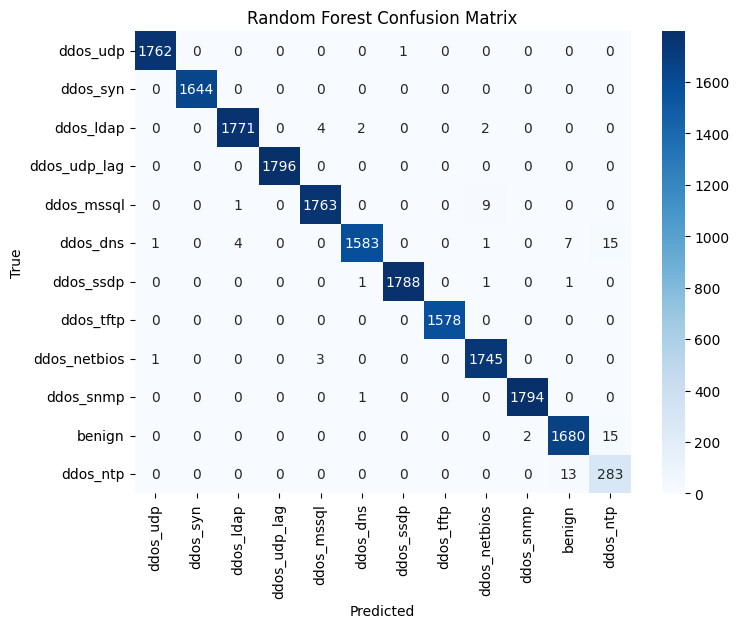


Misclassification Analysis:
               False Positive  False Negative  Recall  Precision
ddos_udp                   2               1  0.9994     0.9989
ddos_syn                   0               0  1.0000     1.0000
ddos_ldap                  5               8  0.9955     0.9972
ddos_udp_lag               0               0  1.0000     1.0000
ddos_mssql                 7              10  0.9944     0.9960
ddos_dns                   4              28  0.9826     0.9975
ddos_ssdp                  1               3  0.9983     0.9994
ddos_tftp                  0               0  1.0000     1.0000
ddos_netbios              13               4  0.9977     0.9926
ddos_snmp                  2               1  0.9994     0.9989
benign                    21              17  0.9900     0.9877
ddos_ntp                  30              13  0.9561     0.9042


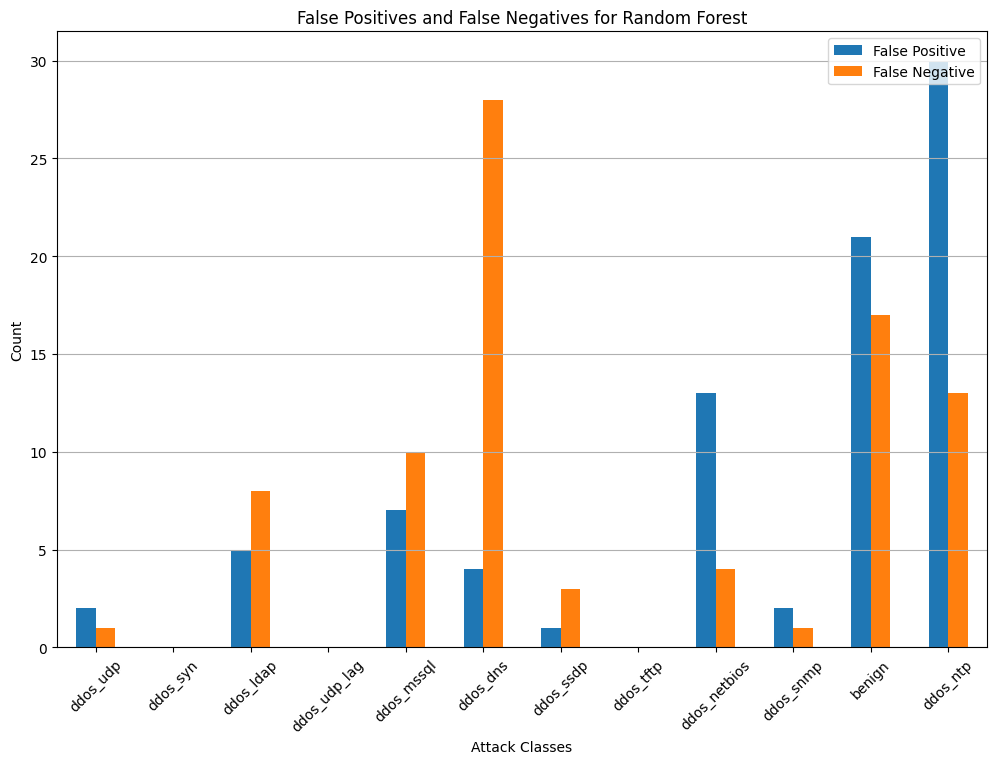

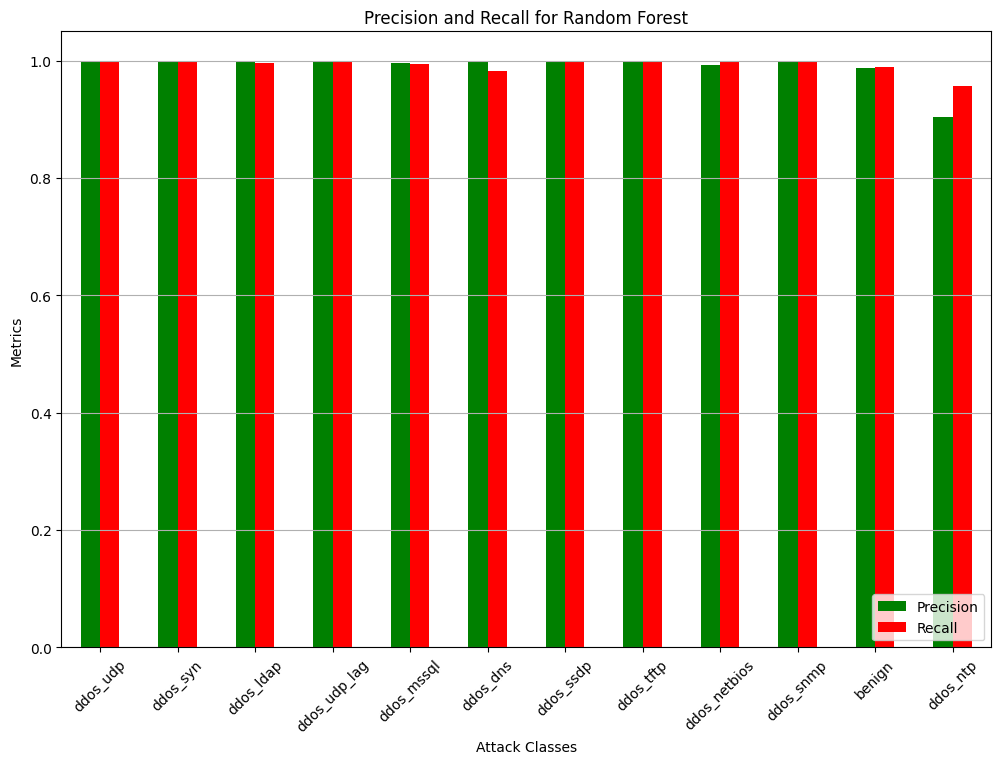


Analyzing performance for Logistic_regressor...

Accuracy: 0.9846


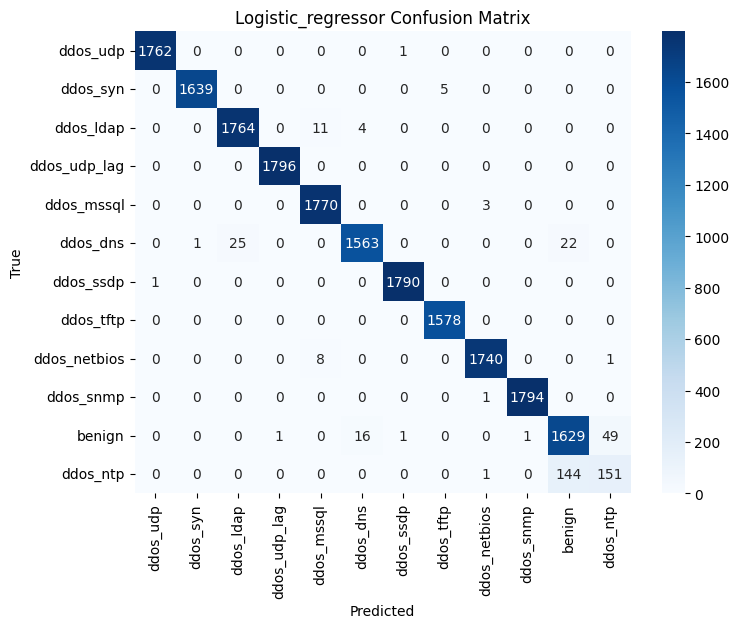


Misclassification Analysis:
               False Positive  False Negative  Recall  Precision
ddos_udp                   1               1  0.9994     0.9994
ddos_syn                   1               5  0.9970     0.9994
ddos_ldap                 25              15  0.9916     0.9860
ddos_udp_lag               1               0  1.0000     0.9994
ddos_mssql                19               3  0.9983     0.9894
ddos_dns                  20              48  0.9702     0.9874
ddos_ssdp                  2               1  0.9994     0.9989
ddos_tftp                  5               0  1.0000     0.9968
ddos_netbios               5               9  0.9949     0.9971
ddos_snmp                  1               1  0.9994     0.9994
benign                   166              68  0.9599     0.9075
ddos_ntp                  50             145  0.5101     0.7512


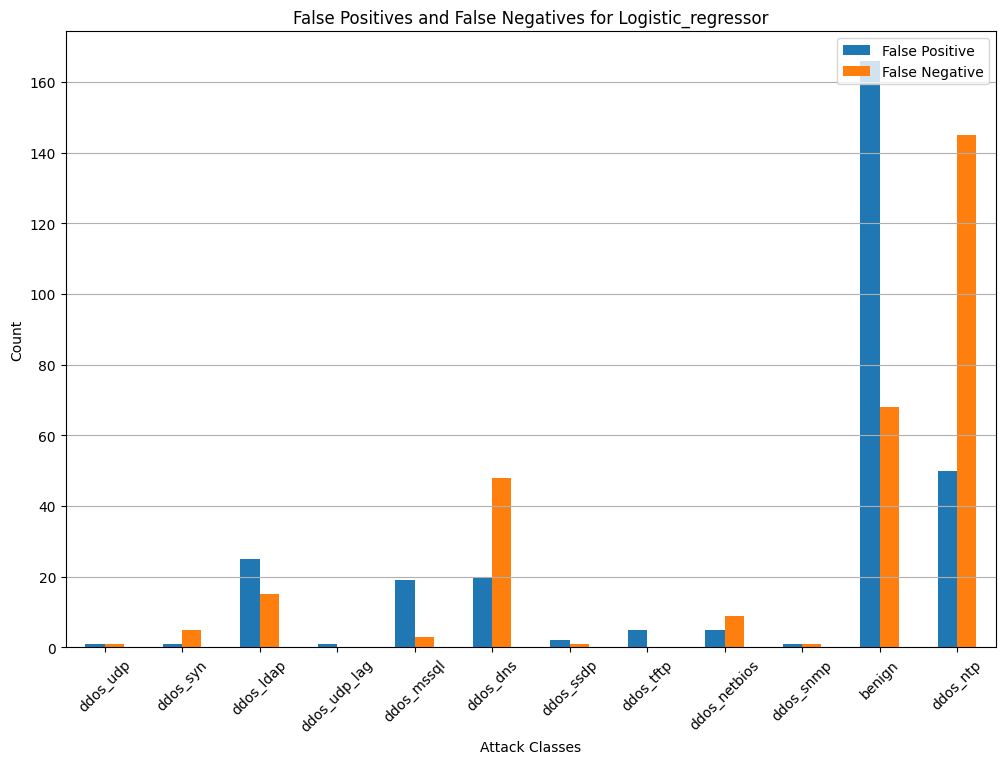

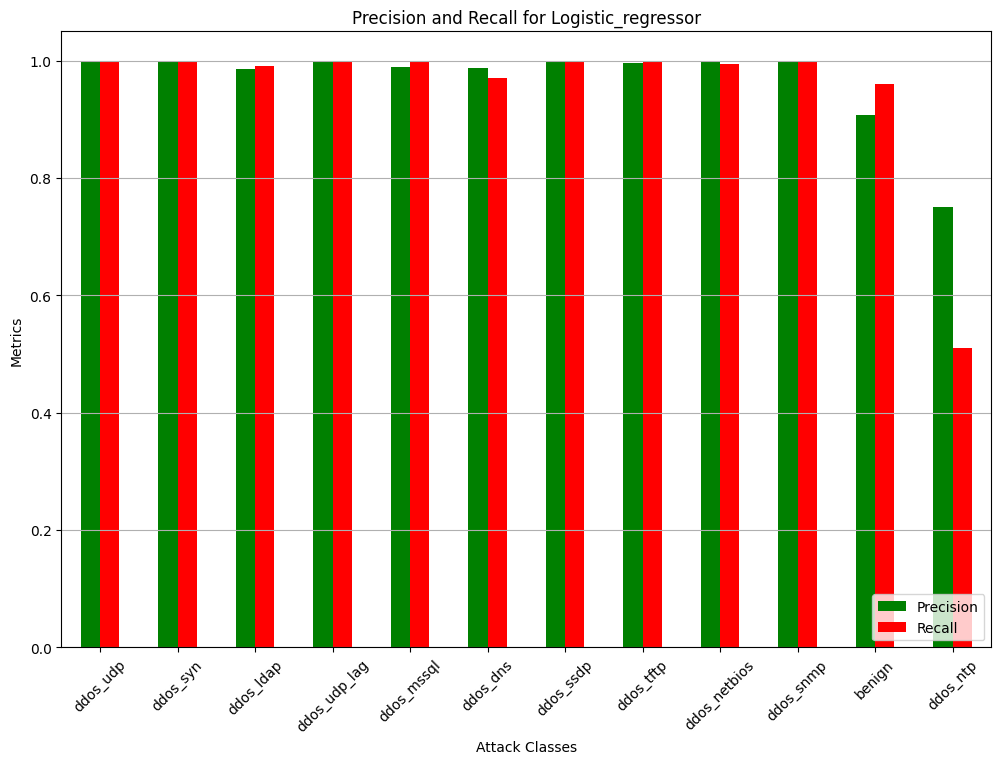


Analyzing performance for KNN...

Accuracy: 0.9949


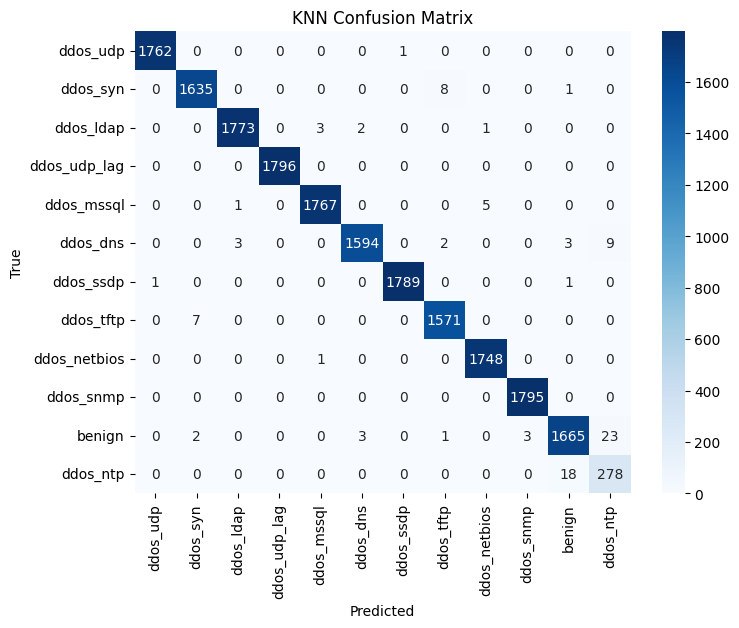


Misclassification Analysis:
               False Positive  False Negative  Recall  Precision
ddos_udp                   1               1  0.9994     0.9994
ddos_syn                   9               9  0.9945     0.9945
ddos_ldap                  4               6  0.9966     0.9977
ddos_udp_lag               0               0  1.0000     1.0000
ddos_mssql                 4               6  0.9966     0.9977
ddos_dns                   5              17  0.9894     0.9969
ddos_ssdp                  1               2  0.9989     0.9994
ddos_tftp                 11               7  0.9956     0.9930
ddos_netbios               6               1  0.9994     0.9966
ddos_snmp                  3               0  1.0000     0.9983
benign                    23              32  0.9811     0.9864
ddos_ntp                  32              18  0.9392     0.8968


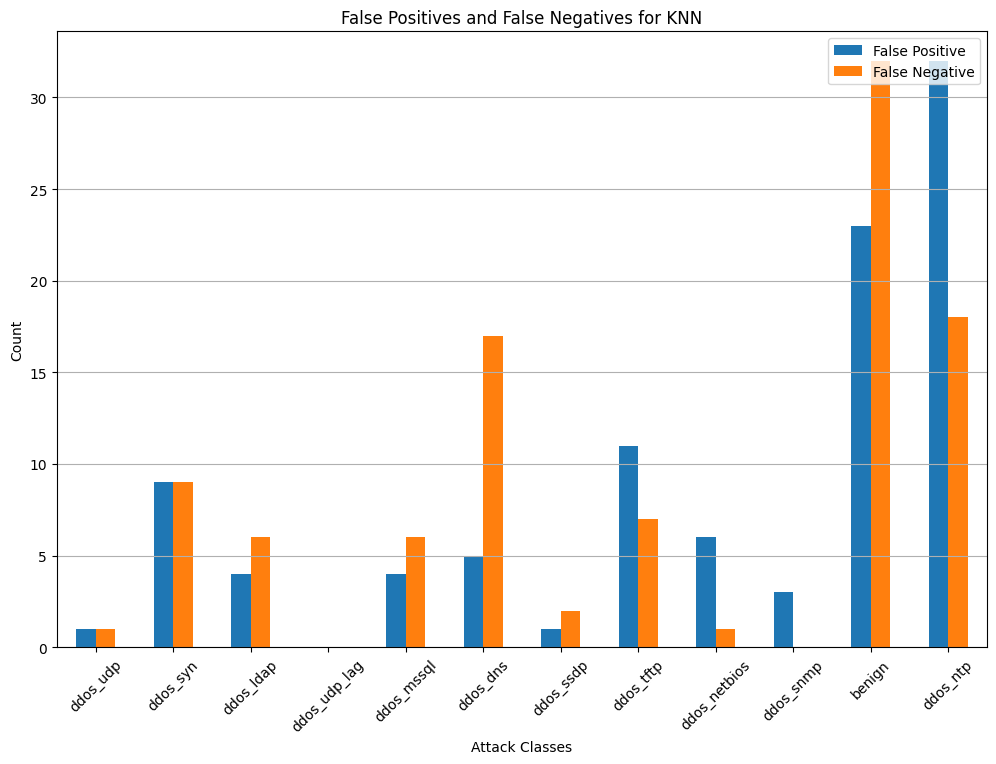

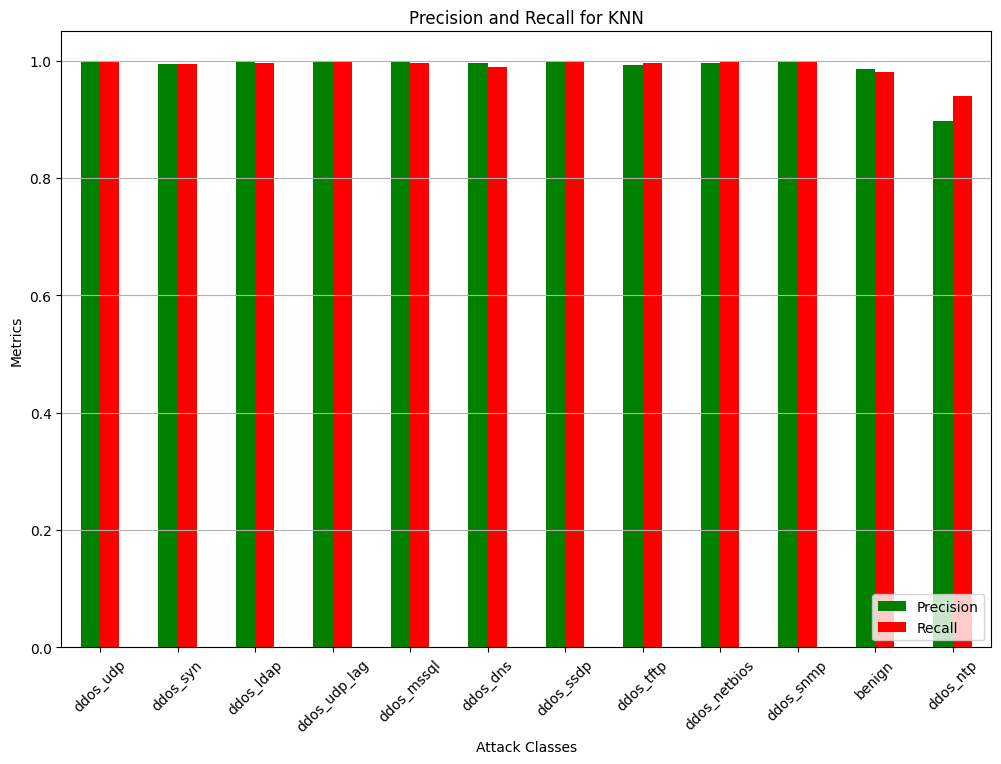

In [11]:
for model_name, metrics in results.items():
    print(f"\nAnalyzing performance for {model_name}...\n")

    accuracy, cm, recall, precision = metrics['accuracy'], metrics['confusion_matrix'], metrics['recall'], metrics ['precision']
    classes = y_test.unique()

    # Print model accuracy
    print(f"Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Create a DataFrame for misclassification analysis
    misclassification_df = pd.DataFrame(index=classes, columns=['False Positive', 'False Negative', 'Recall', 'Precision'])
    misclassification_df['False Positive'] = [cm[:, i].sum() - cm[i, i] for i in range(len(classes))]
    misclassification_df['False Negative'] = [cm[i, :].sum() - cm[i, i] for i in range(len(classes))]
    misclassification_df['Recall'] = [round(r, 4) for r in recall]
    misclassification_df['Precision'] = [round(p, 4) for p in precision]
   

    print("\nMisclassification Analysis:\n", misclassification_df)

    # Plot False Positives and False Negatives
    misclassification_df[['False Positive', 'False Negative']].plot(kind='bar', figsize=(12, 8))
    plt.title(f'False Positives and False Negatives for {model_name}')
    plt.xlabel('Attack Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(loc='upper right')
    plt.show()

    # Plot Precision and Recall
    misclassification_df[['Precision', 'Recall']].plot(kind='bar', figsize=(12, 8), color=['green', 'red'])
    plt.title(f'Precision and Recall for {model_name}')
    plt.xlabel('Attack Classes')
    plt.ylabel('Metrics')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(loc='lower right')
    plt.show()

